### Excercise - 3: Mamdani Fuzzy controller

#### 1) AC
#### 2) Washing Machine
#### 3) Train

c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


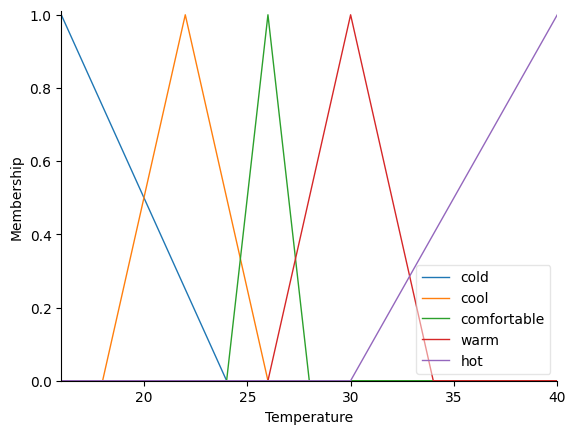

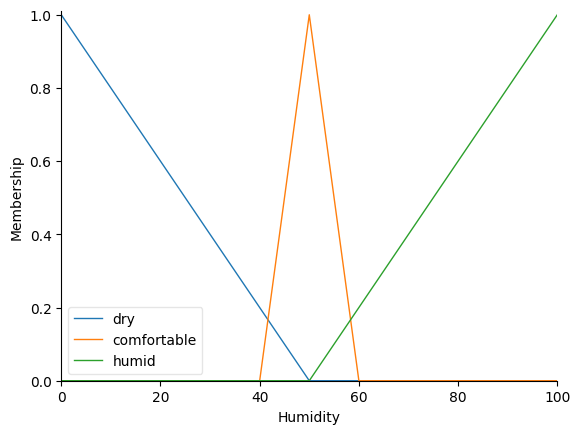

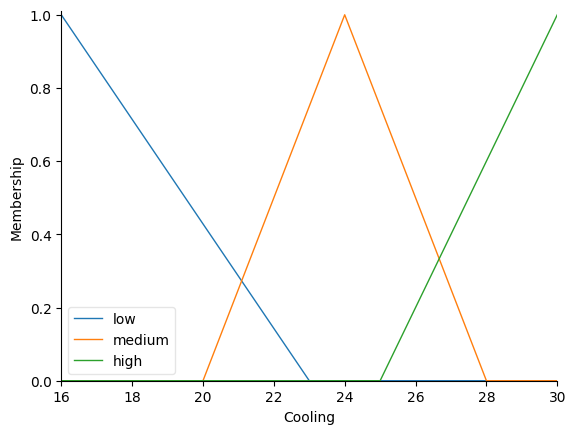

AC Temperature:  19.00588235294118


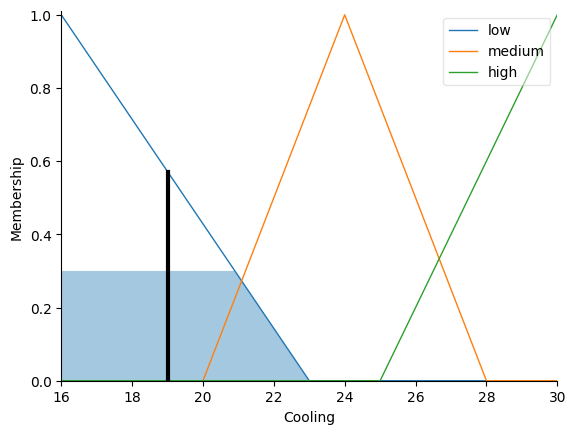

In [1]:
# Test Only:- 
# (defuzification method used is default one which is "Centroid method")

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt


# Define fuzzy variables
temp = ctrl.Antecedent(np.arange(16, 41, 1), 'Temperature')
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'Humidity')
cooling = ctrl.Consequent(np.arange(16, 31, 1), 'Cooling')

# Define membership functions for temperature
temp['cold'] = fuzz.trimf(temp.universe, [16, 16, 24])
temp['cool'] = fuzz.trimf(temp.universe, [18, 22, 26])
temp['comfortable'] = fuzz.trimf(temp.universe, [24, 26, 28])
temp['warm'] = fuzz.trimf(temp.universe, [26, 30, 34])
temp['hot'] = fuzz.trimf(temp.universe, [30, 40, 40])

# Define membership functions for humidity
humidity['dry'] = fuzz.trimf(humidity.universe, [0, 0, 50])
humidity['comfortable'] = fuzz.trimf(humidity.universe, [40, 50, 60])
humidity['humid'] = fuzz.trimf(humidity.universe, [50, 100, 100])

# Define membership functions for cooling
cooling['low'] = fuzz.trimf(cooling.universe, [16, 16, 23])
cooling['medium'] = fuzz.trimf(cooling.universe, [20, 24, 28])
cooling['high'] = fuzz.trimf(cooling.universe, [25, 30, 30])

# Define fuzzy rules
rule1 = ctrl.Rule(temp['cold'] | humidity['humid'], cooling['low'])
rule2 = ctrl.Rule(temp['cool'] & humidity['dry'], cooling['medium'])
rule3 = ctrl.Rule(temp['comfortable'] & humidity['comfortable'], cooling['medium'])
rule4 = ctrl.Rule(temp['warm'] & humidity['dry'], cooling['medium'])
rule5 = ctrl.Rule(temp['hot'] & humidity['dry'], cooling['high'])
rule6 = ctrl.Rule(temp['hot'] & humidity['humid'], cooling['low'])

# Create control system and simulate
ac_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
ac = ctrl.ControlSystemSimulation(ac_ctrl)

# Set input values
ac.input['Temperature'] = 28
ac.input['Humidity'] = 65

# Compute output
ac.compute()


# Plot membership functions
temp.view()
humidity.view()
cooling.view()

plt.show()

# Print output value
print("AC Temperature: ", ac.output['Cooling'])

cooling.view(sim = ac)

Q.1) Design a fuzzy logic based decision modelling for an AC consider Room temperature and Humidity as Input ans AC temperature as output. Use 4 descriptor each for input and output. Derive proper set of rules and using appropriate defuzzyfication technique to get exact AC temperature. The Design should be supported by appropriate figures?

AC Temperature: 18.64319248826291


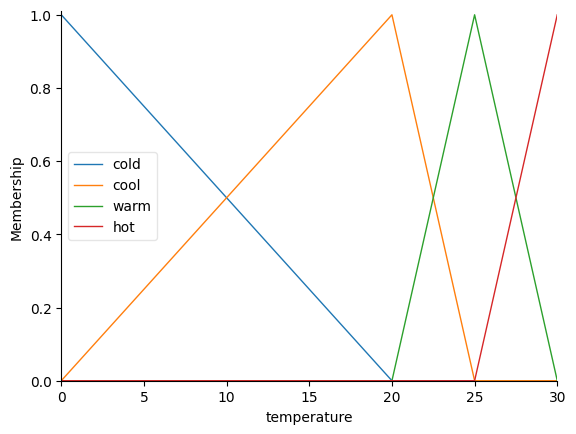

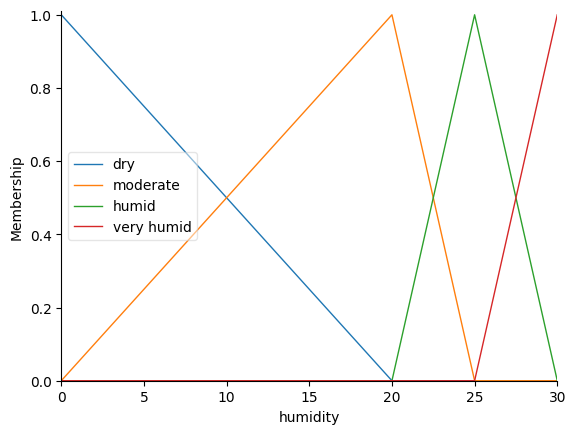

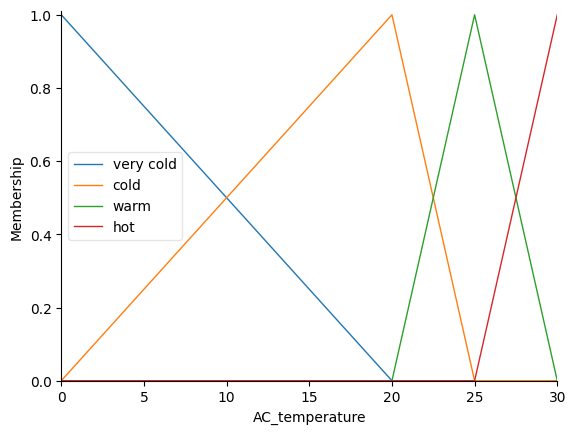

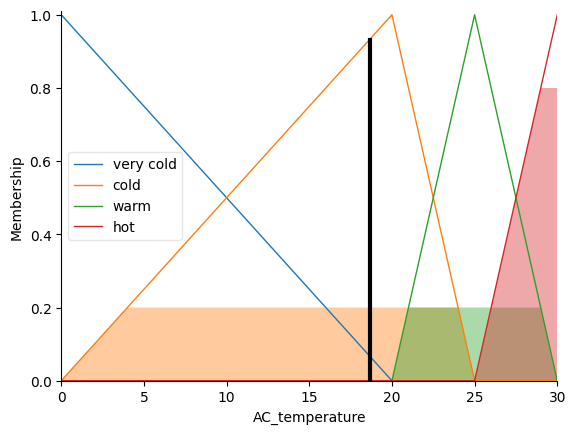

In [2]:
# Note:- 
# 1) For Trapizoidal membership function kindly use "trapmf" instead of trimf which is triangular membership function.
# 2) trimf() takes 4 parameters and trimf() takes 3

# 1) AC:- (defuzification method used is default one which is "Centroid method")

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define input and output variables and their fuzzy sets
temperature = ctrl.Antecedent(np.arange(0, 31, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(0, 31, 1), 'humidity')
AC_temperature = ctrl.Consequent(np.arange(0, 31, 1), 'AC_temperature')

# Define membership functions for input and output variables
temperature['cold'] = fuzz.trimf(temperature.universe, [0, 0, 20])
temperature['cool'] = fuzz.trimf(temperature.universe, [0, 20, 25])
temperature['warm'] = fuzz.trimf(temperature.universe, [20, 25, 30])
temperature['hot'] = fuzz.trimf(temperature.universe, [25, 30, 30])

humidity['dry'] = fuzz.trimf(humidity.universe, [0, 0, 20])
humidity['moderate'] = fuzz.trimf(humidity.universe, [0, 20, 25])
humidity['humid'] = fuzz.trimf(humidity.universe, [20, 25, 30])
humidity['very humid'] = fuzz.trimf(humidity.universe, [25, 30, 30])

AC_temperature['very cold'] = fuzz.trimf(AC_temperature.universe, [0, 0, 20])
AC_temperature['cold'] = fuzz.trimf(AC_temperature.universe, [0, 20, 25])
AC_temperature['warm'] = fuzz.trimf(AC_temperature.universe, [20, 25, 30])
AC_temperature['hot'] = fuzz.trimf(AC_temperature.universe, [25, 30, 30])

# Define fuzzy rules
rule1 = ctrl.Rule(temperature['cold'] & humidity['dry'], AC_temperature['very cold'])
rule2 = ctrl.Rule(temperature['cold'] & humidity['moderate'], AC_temperature['cold'])
rule3 = ctrl.Rule(temperature['cold'] & humidity['humid'], AC_temperature['cold'])
rule4 = ctrl.Rule(temperature['cold'] & humidity['very humid'], AC_temperature['warm'])
rule5 = ctrl.Rule(temperature['cool'] & humidity['dry'], AC_temperature['cold'])
rule6 = ctrl.Rule(temperature['cool'] & humidity['moderate'], AC_temperature['cold'])
rule7 = ctrl.Rule(temperature['cool'] & humidity['humid'], AC_temperature['warm'])
rule8 = ctrl.Rule(temperature['cool'] & humidity['very humid'], AC_temperature['warm'])
rule9 = ctrl.Rule(temperature['warm'] & humidity['dry'], AC_temperature['warm'])
rule10 = ctrl.Rule(temperature['warm'] & humidity['moderate'], AC_temperature['warm'])
rule11 = ctrl.Rule(temperature['warm'] & humidity['humid'], AC_temperature['hot'])
rule12 = ctrl.Rule(temperature['warm'] & humidity['very humid'], AC_temperature['hot'])
rule13 = ctrl.Rule(temperature['hot'] & humidity['dry'], AC_temperature['warm'])
rule14 = ctrl.Rule(temperature['hot'] & humidity['moderate'], AC_temperature['warm'])
rule15 = ctrl.Rule(temperature['hot'] & humidity['humid'], AC_temperature['hot'])
rule16 = ctrl.Rule(temperature['hot'] & humidity['very humid'], AC_temperature['hot'])

# # Define control system
# Define control system
AC_ctrl = ctrl.ControlSystem(
    [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8,
     rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16])

# Create a simulation to test the system
AC_sim = ctrl.ControlSystemSimulation(AC_ctrl)

# # Set input values for temperature and humidity
AC_sim.input['temperature'] = 24 # 35
AC_sim.input['humidity'] = 24 # 80

# Compute the result
AC_sim.compute()

# Get the output value
AC_output = AC_sim.output['AC_temperature']

# Print the output value
print("AC Temperature:", AC_output)

# Plot the membership functions
temperature.view()
humidity.view()
AC_temperature.view()

AC_temperature.view(sim = AC_sim)

Q.2) Design fuzzy logic controller to determine the washtime of a domestic Washing Machine. Assume that input is "dirt" and "grease" on the clothes. Use 3 discriptor for each of this 2 input variables and 5 discriptor variables for output.Device a set of rules for control action and defuzzyfication. Design should be supported by figures whereever possible.

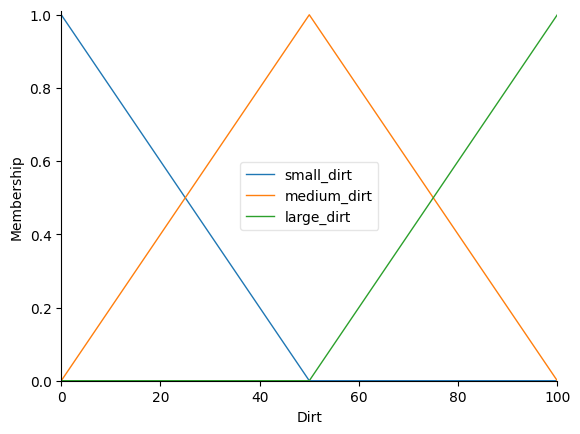

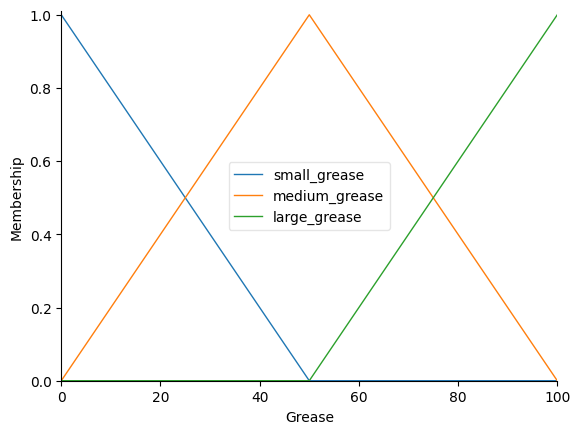

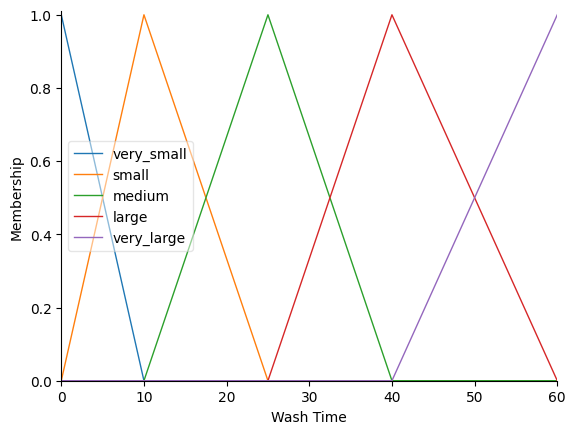

Wash Time:  33.60841423948222


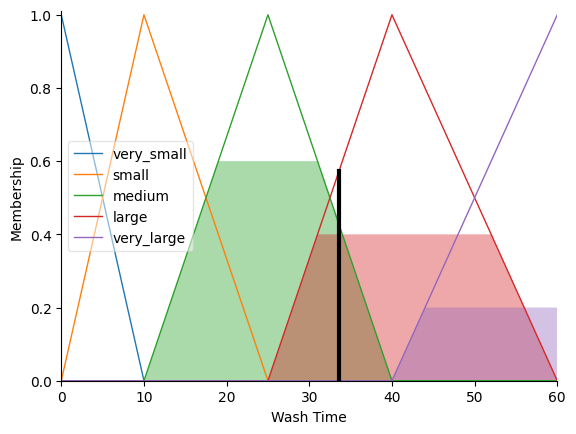

In [3]:
# 2) For washing machine. (defuzification method used is default one which is "Centroid method")

import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Defining input and output variable and also discriptor.
# Inputs are below:- 
dirt = ctrl.Antecedent(np.arange(0, 101, 1), "Dirt")
grease = ctrl.Antecedent(np.arange(0, 101, 1), "Grease")

# Outputs are below:-
wash_time = ctrl.Consequent(np.arange(0, 61, 1), "Wash Time")

# Defining the membership function for dirt
dirt["small_dirt"] = fuzz.trimf(dirt.universe, [0, 0, 50])
dirt["medium_dirt"] = fuzz.trimf(dirt.universe, [0, 50, 100])
dirt["large_dirt"] = fuzz.trimf(dirt.universe, [50, 100, 100])

dirt.view()

# Defining the membership function for grease
grease["small_grease"] = fuzz.trimf(grease.universe, [0, 0, 50])
grease["medium_grease"] = fuzz.trimf(grease.universe, [0, 50, 100])
grease["large_grease"] = fuzz.trimf(grease.universe, [50, 100, 100])

grease.view()

# Defining the membership function for wash_time
wash_time["very_small"] = fuzz.trimf(wash_time.universe, [0, 0, 10])
wash_time["small"] = fuzz.trimf(wash_time.universe, [0, 10, 25])
wash_time["medium"] = fuzz.trimf(wash_time.universe, [10, 25, 40])
wash_time["large"] = fuzz.trimf(wash_time.universe, [25, 40, 60])
wash_time["very_large"] = fuzz.trimf(wash_time.universe, [40, 60, 60])

wash_time.view()

# Defining fuzzy rules
rule1 = ctrl.Rule(dirt["small_dirt"] & grease["small_grease"], wash_time["very_small"])
rule2 = ctrl.Rule(dirt["small_dirt"] & grease["medium_grease"], wash_time["medium"])
rule3 = ctrl.Rule(dirt["small_dirt"] & grease["large_grease"], wash_time["large"])

rule4 = ctrl.Rule(dirt["medium_dirt"] & grease["small_grease"], wash_time["small"])
rule5 = ctrl.Rule(dirt["medium_dirt"] & grease["medium_grease"], wash_time["medium"])
rule6 = ctrl.Rule(dirt["medium_dirt"] & grease["large_grease"], wash_time["large"])

rule7 = ctrl.Rule(dirt["large_dirt"] & grease["small_grease"], wash_time["medium"])
rule8 = ctrl.Rule(dirt["large_dirt"] & grease["medium_grease"], wash_time["large"])
rule9 = ctrl.Rule(dirt["large_dirt"] & grease["large_grease"], wash_time["very_large"])



# Creating control system and simulating
wt_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
wt = ctrl.ControlSystemSimulation(wt_ctrl)

# Now, Setting the input values
wt.input["Dirt"] = 60
wt.input["Grease"] = 70

plt.show()
# Compute output
wt.compute()

print("Wash Time: ", wt.output["Wash Time"])

wash_time.view(sim = wt)

Q.3) Design a fuzzy controller for a train approching or leaving a station. The inputs are distance from the station and speed of the train. The output is amount of brake power used. Use 4 discriptor each for input and output and design using mamdani fuzzy model. Derive set of rules for control action and defuzzyfication. The design should be supported by appropriate figures?

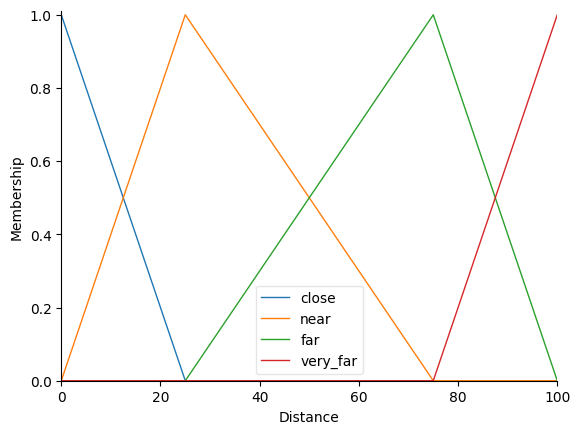

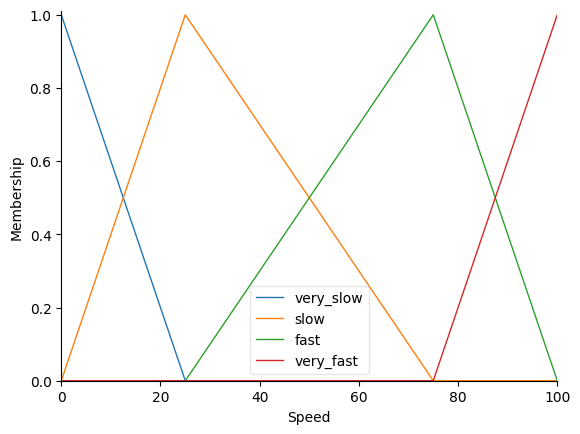

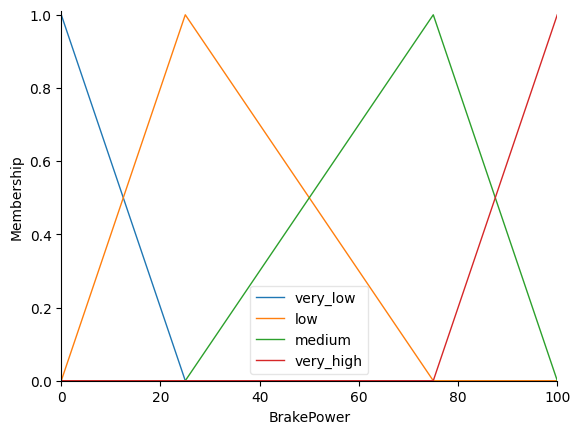

Brake Power:  69.56140350877189


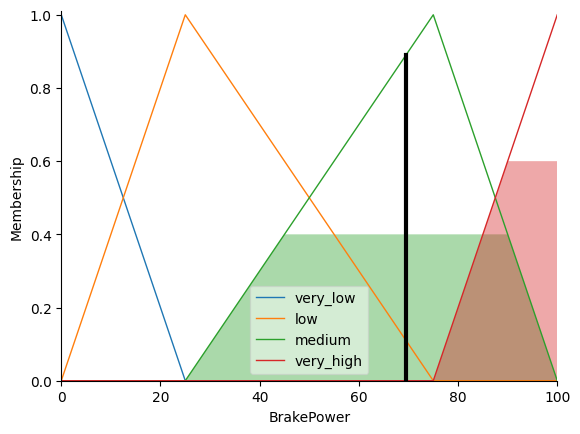

In [4]:
# 3) For Train. (defuzification method used is default one which is "Centroid method")

import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Defining input and output variable and also discriptor.
# Inputs are below:- 
Distance = ctrl.Antecedent(np.arange(0, 101, 1), "Distance")
Speed = ctrl.Antecedent(np.arange(0, 101, 1), "Speed")

# Outputs are below:-
BrakePower = ctrl.Consequent(np.arange(0, 101, 1), "BrakePower")

# Defining the membership function for Distance
Distance["close"] = fuzz.trimf(Distance.universe, [0, 0, 25])
Distance["near"] = fuzz.trimf(Distance.universe, [0, 25, 75])
Distance["far"] = fuzz.trimf(Distance.universe, [25, 75, 100])
Distance["very_far"] = fuzz.trimf(Distance.universe, [75, 100, 100])


Distance.view()

# Defining the membership function for Speed
Speed["very_slow"] = fuzz.trimf(Speed.universe, [0, 0, 25])
Speed["slow"] = fuzz.trimf(Speed.universe, [0, 25, 75])
Speed["fast"] = fuzz.trimf(Speed.universe, [25, 75, 100])
Speed["very_fast"] = fuzz.trimf(Speed.universe, [75, 100, 100])


Speed.view()

# Defining the membership function for BrakePower
BrakePower["very_low"] = fuzz.trimf(BrakePower.universe, [0, 0, 25])
BrakePower["low"] = fuzz.trimf(BrakePower.universe, [0, 25, 75])
BrakePower["medium"] = fuzz.trimf(BrakePower.universe, [25, 75, 100])
BrakePower["very_high"] = fuzz.trimf(BrakePower.universe, [75, 100, 100])

BrakePower.view()

# Defining fuzzy rules
rule1 = ctrl.Rule(Distance["close"] & Speed["very_slow"], BrakePower["very_low"])
rule2 = ctrl.Rule(Distance["close"] & Speed["slow"], BrakePower["low"])
rule3 = ctrl.Rule(Distance["close"] & Speed["fast"], BrakePower["medium"])
rule4 = ctrl.Rule(Distance["close"] & Speed["very_fast"], BrakePower["very_high"])


rule5 = ctrl.Rule(Distance["near"] & Speed["very_slow"], BrakePower["very_low"])
rule6 = ctrl.Rule(Distance["near"] & Speed["slow"], BrakePower["low"])
rule7 = ctrl.Rule(Distance["near"] & Speed["fast"], BrakePower["medium"])
rule8 = ctrl.Rule(Distance["near"] & Speed["very_fast"], BrakePower["very_high"])


rule9 = ctrl.Rule(Distance["far"] & Speed["very_slow"], BrakePower["very_low"])
rule10 = ctrl.Rule(Distance["far"] & Speed["slow"], BrakePower["very_low"])
rule11 = ctrl.Rule(Distance["far"] & Speed["fast"], BrakePower["medium"])
rule12 = ctrl.Rule(Distance["far"] & Speed["very_fast"], BrakePower["medium"])

rule13 = ctrl.Rule(Distance["very_far"] & Speed["very_slow"], BrakePower["very_low"])
rule14 = ctrl.Rule(Distance["very_far"] & Speed["slow"], BrakePower["very_low"])
rule15 = ctrl.Rule(Distance["very_far"] & Speed["fast"], BrakePower["medium"])
rule16 = ctrl.Rule(Distance["very_far"] & Speed["very_fast"], BrakePower["very_high"])



# Creating control system and simulating
t_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16])
t = ctrl.ControlSystemSimulation(t_ctrl)

# Now, Setting the input values
t.input["Distance"] = 20
t.input["Speed"] = 90

plt.show()
# Compute output
t.compute()

print("Brake Power: ", t.output["BrakePower"])

BrakePower.view(sim = t)